# Import library

In [2]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

# Load data

In [3]:
data = pd.read_csv('../data/data_numerical/data_with_numerical_features.csv', index_col='Unnamed: 0')

In [4]:
data.head()

,srcip,sport,dstip,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,...,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
1070955,59.166.0.1,4951,149.171.126.9,21,0.013459,0.000294,0.000787,0.0,0.114625,0.002998,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
916662,59.166.0.4,62358,149.171.126.1,25,0.001210,0.003865,0.000712,0.0,0.114625,0.005179,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1046586,59.166.0.5,57496,149.171.126.2,53,0.000018,0.000009,0.000037,0.0,0.114625,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1063099,59.166.0.1,62868,149.171.126.0,47026,0.000816,0.000907,0.000089,0.0,0.114625,0.001090,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
521750,59.166.0.7,39489,149.171.126.3,53,0.000019,0.000009,0.000037,0.0,0.114625,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Label Encoding

In [5]:
# create a df from the column 'attack_cat' of the df data
multi_label = pd.DataFrame(data.attack_cat)
multi_label

,attack_cat
1070955,normal
916662,normal
1046586,normal
1063099,normal
521750,normal
...,...
230172,normal
1069661,normal
532255,normal
879681,normal


In [6]:
# create another df that contains numeric values
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
enc_label

,attack_cat
1070955,5
916662,5
1046586,5
1063099,5
521750,5
...,...
230172,5
1069661,5
532255,5
879681,5


In [7]:
# LABEL ENCODING:
# For example, if 'attack_cat' has 9 categories (Analysis, Backdoor, ..., Worms)
# then the use of .get_dummies() will replace the column 'attack_cat' by 9 new columns.
# The new columns include 'attack_cat_Analysis', 'attack_cat_Backdoor', ..., 'attack_cat_Worms'.
data = pd.get_dummies(data, columns=['attack_cat'])
data

,srcip,sport,dstip,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,...,state_REQ,state_RST,attack_cat_backdoors,attack_cat_dos,attack_cat_exploits,attack_cat_fuzzers,attack_cat_generic,attack_cat_normal,attack_cat_reconnaissance,attack_cat_worms
1070955,59.166.0.1,4951,149.171.126.9,21,0.013459,0.000294,0.000787,0.0,0.114625,0.002998,...,0.0,0.0,0,0,0,0,0,1,0,0
916662,59.166.0.4,62358,149.171.126.1,25,0.001210,0.003865,0.000712,0.0,0.114625,0.005179,...,0.0,0.0,0,0,0,0,0,1,0,0
1046586,59.166.0.5,57496,149.171.126.2,53,0.000018,0.000009,0.000037,0.0,0.114625,0.000000,...,0.0,0.0,0,0,0,0,0,1,0,0
1063099,59.166.0.1,62868,149.171.126.0,47026,0.000816,0.000907,0.000089,0.0,0.114625,0.001090,...,0.0,0.0,0,0,0,0,0,1,0,0
521750,59.166.0.7,39489,149.171.126.3,53,0.000019,0.000009,0.000037,0.0,0.114625,0.000000,...,0.0,0.0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230172,59.166.0.7,52739,149.171.126.4,21,0.014025,0.000294,0.000788,0.0,0.114625,0.002998,...,0.0,0.0,0,0,0,0,0,1,0,0
1069661,59.166.0.3,32346,149.171.126.5,53,0.000018,0.000009,0.000037,0.0,0.114625,0.000000,...,0.0,0.0,0,0,0,0,0,1,0,0
532255,59.166.0.2,7346,149.171.126.3,53,0.000017,0.000008,0.000034,0.0,0.114625,0.000000,...,0.0,0.0,0,0,0,0,0,1,0,0
879681,59.166.0.9,18776,149.171.126.3,53,0.000020,0.000009,0.000037,0.0,0.114625,0.000000,...,0.0,0.0,0,0,0,0,0,1,0,0


# Correlation between features of dataset

In [8]:
# select all columns of numeric types (including the label column if applicable)
num_col = list(data.select_dtypes(include='number').columns)
print(num_col)

['sport', 'dsport', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_ACC', 'state_CLO', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST', 'attack_cat_backdoors', 'attack_cat_dos', 'attack_cat_exploits', 'attack_cat_fuzzers', 'attack_cat_generic', 'attack_cat_normal', 'attack_cat_reconnaissance', 'attack_cat_worms']


In [9]:
len(num_col)

72

In [10]:
# compute pairwise correlation of columns
corr_matrix = data[num_col].corr()

In [11]:
corr_matrix.shape

(72, 72)

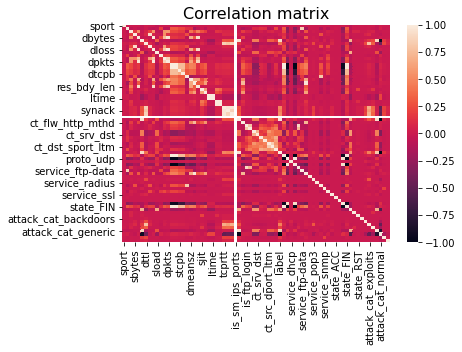

In [12]:
# Correlation Matrix for Multi-class Labels
plt.figure()
sns.heatmap(corr_matrix)
plt.title('Correlation matrix', fontsize=16)
plt.savefig('../plots/correlation_matrix_multi_new.png')
plt.show()

# Feature Selection

In [64]:
# Brute force Method to find Correlation between features
def correlation(data, threshold=None):
    # Set of all names of correlated columns
    col_corr = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if (abs(corr_mat.iloc[i,j]) > threshold):
                colname = corr_mat.columns[i]
                col_corr.add((colname))
    return col_corr

In [65]:
corr_features = correlation(data=data, threshold=0.95) 
len(corr_features)

14

In [66]:
corr_features

{'ackdat',
 'attack_cat_normal',
 'dintpkt',
 'dloss',
 'dpkts',
 'dwin',
 'label',
 'ltime',
 'proto_tcp',
 'proto_udp',
 'service_dns',
 'service_http',
 'state_FIN',
 'synack'}

In [45]:
multi_data = data[corr_features]

# Multi-Class Classification

In [46]:
X = multi_data.drop(columns=['label'], axis=1)
Y = multi_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=50)

# Save data

In [47]:
X_train.to_csv('../data/data_numerical/multiple_classification/X_train_1.csv')
X_test.to_csv('../data/data_numerical/multiple_classification/X_test_1.csv')
y_train.to_csv('../data/data_numerical/multiple_classification/y_train_1.csv')
y_test.to_csv('../data/data_numerical/multiple_classification/y_test_1.csv')